# Case Study: Classification

The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.

**Our main question is: <br/>**
*Will the customer accept the credit card offer? Y/N*


The **definition of the features** is the following:
- **Customer Number:** A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted:** Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Mailer Type:** Letter or postcard.
- **Income Level:** Low, Medium or High.
- **#Bank Accounts Open:** How many non-credit-card accounts are held by the customer.
- **Overdraft Protection:** Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating:** Low, Medium or High.
- **#Credit Cards Held:** The number of credit cards held at the bank.
- **#Homes Owned:** The number of homes owned by the customer.
- **Household Size:** Number of individuals in the family.
- **Own Your Home:** Does the customer own their home? (Yes or No).
- **Average Balance:** Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4
- **Balance:** Average balance for each quarter in the last year


### Tables of Content

<ul>
<li><a ref="#eda">1. Exploratory Data Analysis</a></li>
<li><a ref="#cleaning">2. Cleaning</a></li>
<li><a ref="#prep">3. Preprocessing</a></li>
<li><a ref="#modelling">4. Modelling</a></li>
</ul>


<a id=’eda’></a>
# 1. Exploratory Data Analysis

In this part we want to familirize ourselves with the data set. We are going to look at the following steps:
- assess dataframe 
- shape, dtypes, statistics
- null values, white spaces, duplicates, (amount)unique values per col /unique(written same), mislabeled classes (male ≠ Male), typos/inconsistent capitalisation, irrelevant columns
- missing data
- visualisations

In [3]:
# import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# load dataset into a pandas dataframe
# renaming columns
data = pd.read_csv('/Users/lilmac/Documents/GitHub/ironhack-case-study-classification/data_sets/creditcardmarketing.csv')
data.to_csv('/Users/lilmac/Documents/GitHub/ironhack-case-study-classification/data_sets/creditcardmarketing.csv', header=['customer_number','offer_accepted','reward','mailer_type', 'income_level','bank_accounts_open','overdraft_protection','credit_rating','credit_cards_held','homes_owned','household_size','own_home','avg_balance','q1_balance','q2_balance','q3_balance','q4_balance'], index=False)

In [4]:
#test
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


### Assess dataframe

In [5]:
# assess shape
data.shape

(17999, 17)

In [6]:
# assess column names
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_home', 'avg_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

In [7]:
#data types of columns
data.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_home                 object
avg_balance             float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [8]:
# list of columns, their non-null objects and data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17999 non-null  int64  
 1   offer_accepted        17999 non-null  object 
 2   reward                17999 non-null  object 
 3   mailer_type           17999 non-null  object 
 4   income_level          17999 non-null  object 
 5   bank_accounts_open    17999 non-null  int64  
 6   overdraft_protection  17999 non-null  object 
 7   credit_rating         17999 non-null  object 
 8   credit_cards_held     17999 non-null  int64  
 9   homes_owned           17999 non-null  int64  
 10  household_size        17999 non-null  int64  
 11  own_home              17999 non-null  object 
 12  avg_balance           17975 non-null  float64
 13  q1_balance            17975 non-null  float64
 14  q2_balance            17975 non-null  float64
 15  q3_balance         

- 'customer_number' as this is only an index, which we already have, so we dont need it twice.<br/><br/>
- The rest of the data types look suiting to their description.

In [9]:
#check, if there are any nulls and NaN values in our data set
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_home                 0
avg_balance             24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

We can see that there are 24 entries for avg balance and q1-q5 balances, that have null values.<br/>
We suspect, that these 24 values are all the same rows for the 5 features.
24 out of 18.000 values is a faily small amount, which would justify to either drop the rows or replace the null values with the mean.<br/>
We will do so in the data cleaning phase.

In [10]:
# assess df's duplicated values
sum(data.duplicated())

0

Next step is to look at the **unique values in the categorical features**:

In [11]:
# check unique values
data['offer_accepted'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# check unique values
data['reward'].unique()

array(['Air Miles', 'Cash Back', 'Points'], dtype=object)

In [13]:
# check unique values
data['mailer_type'].unique()

array(['Letter', 'Postcard'], dtype=object)

In [14]:
# check unique values
data['income_level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [15]:
# check unique values
data['overdraft_protection'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# check unique values
data['credit_rating'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [17]:
# check unique values
data['own_home'].unique()

array(['Yes', 'No'], dtype=object)

All the unique values seem to be normal and expected.

We want to see the outliers in the numerical dataframe too.

In [18]:
# check for outliers in the numerical dataframe
data.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000
mean,9001.000000,1.255792,1.903495,1.203456,3.499028,940.503310,910.408456,999.398999,1042.030654,810.175132
std,5196.008083,0.472510,0.797031,0.427350,1.114207,350.303729,620.068494,457.414081,553.467854,559.015084
min,2.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4501.500000,1.000000,1.000000,1.000000,3.000000,787.500000,392.500000,663.000000,633.000000,363.000000
50%,9001.000000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.000000,703.000000
75%,13500.500000,1.000000,2.000000,1.000000,4.000000,1153.125000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Numerical values seems valid, we don't see any outliers which would make our lives harder when training the model.

In [19]:
# check for null or NaN values
data['avg_balance'].isnull().values.any()

True

In [20]:
# check for null or NaN values
data['q1_balance'].isnull().values.any()

True

In [21]:
# check for null or NaN values
data['q2_balance'].isnull().values.any()

True

In [22]:
# check for null or NaN values
data['q3_balance'].isnull().values.any()

True

In [23]:
# check for null or NaN values
data['q4_balance'].isnull().values.any()

True

### Summary of Assesment
- customer_number column makes no difference if exists or not
- we have 24 null values we need to drop
- float values will cause problems later so we need to convert them to integers

## Visualisations

We want to visualise the relationships between between the different features in the data.

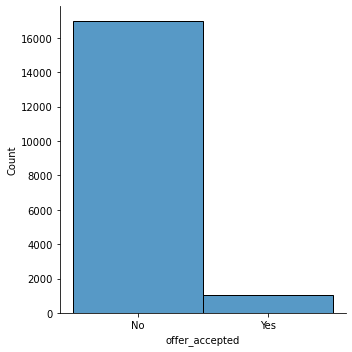

In [24]:
# how many accepted the offer vs who didn't
sns.displot(data['offer_accepted']);

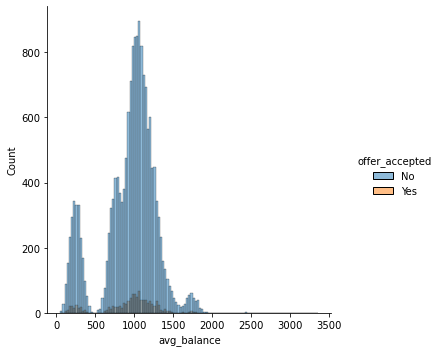

In [25]:
# what's the avg balance of customers who accepted the offer vs who didn't
sns.displot(data, x='avg_balance', hue='offer_accepted');

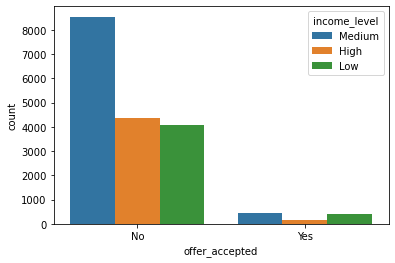

In [26]:
# different income levels of who accepted the offer vs who didn't
sns.countplot(data = data, x = 'offer_accepted', hue = 'income_level');

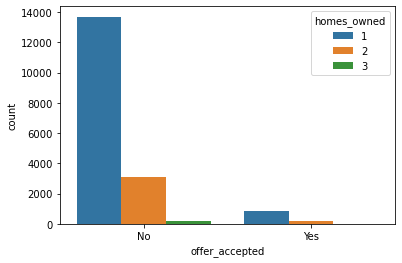

In [27]:
# amount of homes owned
sns.countplot(data = data, x = 'offer_accepted', hue = 'homes_owned');

Let's see the relationship between the quarters and offer accepted.

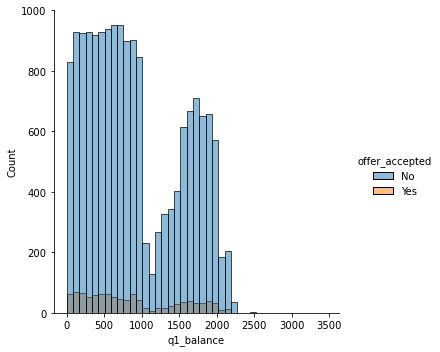

In [28]:
# what's the q1 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q1_balance', hue='offer_accepted');

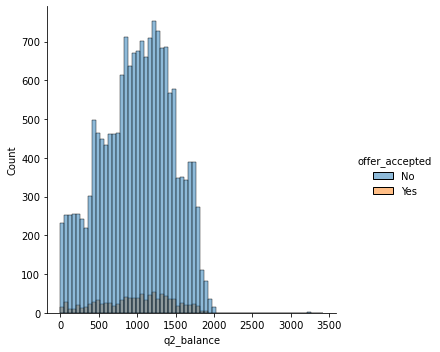

In [29]:
# what's the q2 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q2_balance', hue='offer_accepted');

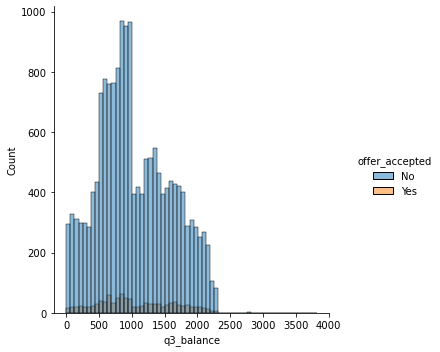

In [30]:
# what's the q3 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q3_balance', hue='offer_accepted');

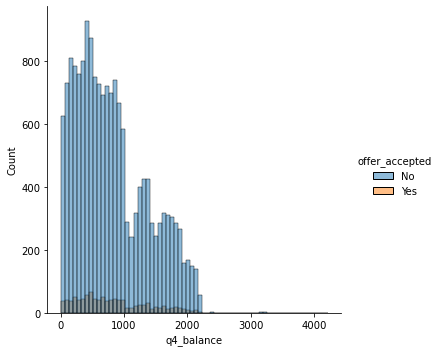

In [31]:
# what's the q4 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q4_balance', hue='offer_accepted');

### Summary of Visual Assessment

We could not conclude too much with the visualisations only so we will proceed towards cleaning the data and training our model and 
exploring feature relationships further in Tableau.

<a id=’cleaning’></a>
# 2. Cleaning & Wrangling

**Tasks**
- drop 'customer_number' column
- drop null values
- convert float columns to int

In [32]:
# before cleaning, create a copy of the dataframe
data_copy = data.copy()

In [33]:
# drop customer_number column
data.drop(['customer_number'], axis=1, inplace=True)

In [34]:
#test
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [35]:
# drop rows with missing values
data = data.dropna()

In [36]:
#test 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17975 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17975 non-null  object 
 1   reward                17975 non-null  object 
 2   mailer_type           17975 non-null  object 
 3   income_level          17975 non-null  object 
 4   bank_accounts_open    17975 non-null  int64  
 5   overdraft_protection  17975 non-null  object 
 6   credit_rating         17975 non-null  object 
 7   credit_cards_held     17975 non-null  int64  
 8   homes_owned           17975 non-null  int64  
 9   household_size        17975 non-null  int64  
 10  own_home              17975 non-null  object 
 11  avg_balance           17975 non-null  float64
 12  q1_balance            17975 non-null  float64
 13  q2_balance            17975 non-null  float64
 14  q3_balance            17975 non-null  float64
 15  q4_balance         

In [37]:
# test2
data.isna().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_home                0
avg_balance             0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [38]:
# converting columns from float to int
data = data.astype({"avg_balance":'int', "q1_balance":'int',"q2_balance":'int',"q3_balance":'int',"q4_balance":'int'}) 

In [39]:
#test 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17975 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   offer_accepted        17975 non-null  object
 1   reward                17975 non-null  object
 2   mailer_type           17975 non-null  object
 3   income_level          17975 non-null  object
 4   bank_accounts_open    17975 non-null  int64 
 5   overdraft_protection  17975 non-null  object
 6   credit_rating         17975 non-null  object
 7   credit_cards_held     17975 non-null  int64 
 8   homes_owned           17975 non-null  int64 
 9   household_size        17975 non-null  int64 
 10  own_home              17975 non-null  object
 11  avg_balance           17975 non-null  int64 
 12  q1_balance            17975 non-null  int64 
 13  q2_balance            17975 non-null  int64 
 14  q3_balance            17975 non-null  int64 
 15  q4_balance            17975 non-null

<a id=’prep’></a>
# 3. Preprocessing

**Tasks:**
- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)
- normalizer
- encoding into dummies

In [40]:
# split numerical and categorical data into two dataframes
data_num = data.select_dtypes(include=['number'])
data_num.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,2,5,147,39,106,78,366
1,2,2,1,2,276,367,352,145,242
2,2,1,1,4,1219,1578,1760,1119,419
3,1,2,1,6,1211,2140,1357,982,365
4,1,3,1,4,1114,1847,1365,750,497


In [41]:
# split numerical and categorical data into two dataframes
data_cat = data.select_dtypes(include=['object'])
data_cat.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_home
0,No,Air Miles,Letter,Medium,No,Medium,Yes
1,No,Air Miles,Postcard,High,No,Medium,Yes
2,No,Air Miles,Letter,Medium,No,High,No
3,No,Air Miles,Letter,Medium,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No


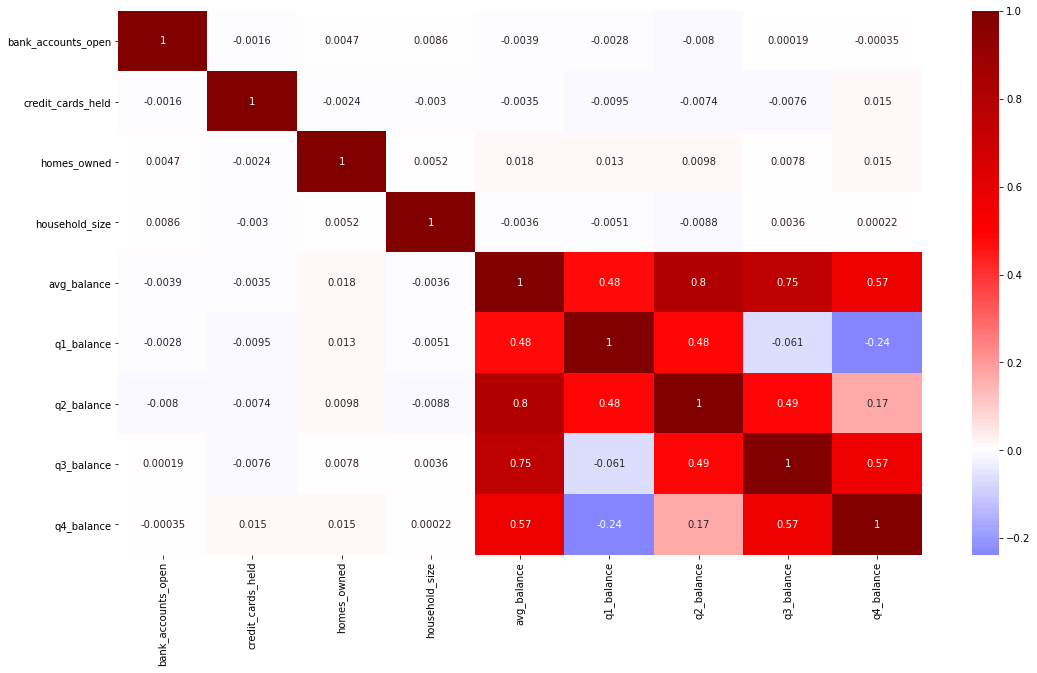

In [42]:
#correlation for numerial columns
corr_matrix = data_num.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='seismic', center = 0, annot=True);

The corr matrix tells us which features are messing up our matrix. We might need to turn these features into categorical ones to have a clean correlation matrix and reduce noise in the model in a future iteration.

In [43]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X = data_num

In [44]:
#check X
X.head(5)

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,2,5,147,39,106,78,366
1,2,2,1,2,276,367,352,145,242
2,2,1,1,4,1219,1578,1760,1119,419
3,1,2,1,6,1211,2140,1357,982,365
4,1,3,1,4,1114,1847,1365,750,497


In [45]:
# normalize and transform
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [46]:
# concat variables into X df
X = pd.DataFrame(x_normalized, columns=X.columns)

In [47]:
X_cols = X.columns

In [48]:
#check columns to copy into cat dataframe
data_cat.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_home'],
      dtype='object')

In [49]:
#encoding categorical features
cat = pd.get_dummies(data_cat, columns=['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_home'], drop_first = True)

In [50]:
#test cat df
cat

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_home_Yes
0,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,0,0,1,1
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17994,0,1,0,0,0,0,0,1,0,1
17995,0,1,0,0,0,0,0,1,0,1
17996,0,1,0,0,0,0,0,1,0,0
17997,0,1,0,0,0,1,0,0,1,1


In [51]:
# dropping offer_accepted_Yes column as that's what we wanna predict
cat_clean = cat.drop(['offer_accepted_Yes'], axis=1)

In [52]:
#test cat_clean df
cat_clean

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_home_Yes
0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,1
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17994,1,0,0,0,0,0,1,0,1
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,0
17997,1,0,0,0,1,0,0,1,1


**Spliting off depended variable (Label)**

**'offer_accepted_Yes'**
because we want to predict if the customer accepts the offer<br/><br/>
offer accepted = YES = 1<br/>
offer not accepted = NO = 0<br/>

In [53]:
#defining the target y
y = cat['offer_accepted_Yes']

In [54]:
#checking the len of x_normalized & cat_clean before merginf back together in X
len(x_normalized), len(y), len(data)

(17975, 17975, 17975)

In [55]:
# bring the numerical data (scaled)in with the categorical
X = np.concatenate((x_normalized, cat_clean),axis=1)

In [56]:
#test
X

array([[2.39429115e-03, 4.78858231e-03, 4.78858231e-03, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.10695755e-03, 3.10695755e-03, 1.55347877e-03, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.85938298e-04, 3.42969149e-04, 3.42969149e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.01171850e-04, 8.02343699e-04, 4.01171850e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.16698354e-04, 1.66679342e-03, 8.33396709e-04, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.37191952e-04, 7.37191952e-04, 3.68595976e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

<a id=’modelling’></a>
# 4. Modelling

**- iteration 1 (X)**

In our first iteration we only used preprocessing and encoding, we use this as a benchmark for the next iterations to compare to.

**- iteration 2 (X_i2)**

SMOKE sampling to improve the imbalance of the target

**- iteration 3 (X_i3)**

dropping quarterly balance columns to reduce noise

**- iteration 4 (X_i4)**

encoding numerical features to categorical ones

**- iteration 5 (X_i5)**

using KNN on the i3

### Modeling (X)

In [57]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Test & Train

In [58]:
#train test split - splitting X and y each into 2 data sets(train data and test data)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [59]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [60]:
#perform prediction on the test set using predict()
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [61]:
#check the predictions array
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

#### Accuracy Score

In [62]:
#calculating the accuracy score
accuracy_score(y_test, predictions)

0.9442280945757997

We have an accurcy score of 0.94, which is for the first itertion quiet good.
Maybe we can improve it by som further feature engineering in the following iterations.

#### Confusion matrix

In [63]:
#defining the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[6789,    0],
       [ 401,    0]])

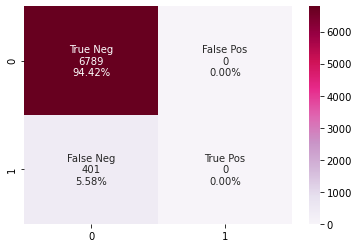

In [143]:
#visualizing the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='PuRd');

**First having a look again which is the dependend variable (here its offer accepted Yes/No)**<br/>
0 = No - does not accept offer<br/>
1 = Yes - accepts offer<br/><br/>

**Explanations**<br/>
TN(True negative,0/0) - model predict its No and it is No for 6789 values<br/>
FN(False negative,1/0) - model predict its Yes, but its No for 401 values<br/>
FP(False positive,0/1) - model predict its No, but its Yes for 0 values<br/>
TP(True positive,1/1) - model predict its Yes and it is Yes for 0 values<br/><br/>

**Conclusion**<br/>
**FP** - It great, as its 0%.<br/>
**FN** - 5% is not ideal, but still quiet ok.<br/>
**TN** - This is great, 94% are correctly predicted.<br/>
**TP** - Here is the real issue, because we dont have any true positive (correct predicted offers accepted), we cannot really predict if somebody will actually accept the offer.
THis however is the cruicial part for the business case. It is good to know, that we can correctly predict if a customer will decline the offer, however we need to get more insights on the customers who accept the offers to see how we can convince the customers, who are declining at the moment.<br/>
This is why we need to improve our TP value in the next iteration.<br/>
This can be done by balancing our data for the offer accept feature. As of now it is heavily imbalanced and therefor we were not surprised by the outcome of the confusion amtrix.

#### ROC/AUC

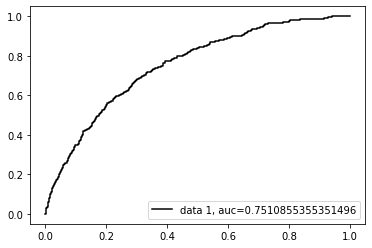

In [162]:
#visualising the ROC and AUC
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='k')
plt.legend(loc=4)
plt.show()

**ROC Curve**
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

- the closer to left hand corner the better
- should not be below red line

**AUC** - area under the curve the bigger the area under the curve the better the model
1 represents perfect classifier, and 0.5 represents a worthless classifier.<br/>
AUC = 0.75

**Conclusion**
Our ROC and AUC are for the first iteration quite ok. But they can definitly be improved!
For the next iteration the AUC should increase and the ROC should be getting closer to the left corner.

### Modeling (X_i2)

We are going to try to improve our model by balancing our target feature using the SMOTE sampling technique. <br/>
SMOTE (Synthetic Minority Oversampling Technique) is an over sampling technique based on nearest neighbors that adds new points between existing points.

We will proceed as follows:
- import smothe
- define variable
- recreate X and y using smote and resample over X an y
- look at value counts
- re do train test split
- re do model
- re do accuracy/confusion matrix/ROC/AUC
- comparision iterations

In [66]:
#import smothe
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [67]:
#define smote variable
smote = SMOTE()

In [68]:
#recreate X and y
X_i2, y_i2 = smote.fit_resample(X, y)
y_i2.value_counts()

0    16954
1    16954
Name: offer_accepted_Yes, dtype: int64

#### Test & Train

In [69]:
#redo train test split it2
X_i2_train, X_i2_test, y_i2_train, y_i2_test =train_test_split(X_i2, y_i2, test_size= 0.6, random_state=40)

In [70]:
#apply model it2 
classification_i2 = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_i2_train, y_i2_train)

#### Accuracy score

In [71]:
#accuracy assessment it2
predictions_i2 = classification_i2.predict(X_i2_test)
accuracy_score(y_i2_test, predictions_i2)

0.7020889653477513

**Comparision accuracy it1 and it2**

accuracy it1 = 0.74<br/>
accuracy it2 = 0.70<br/><br/>

The accuracy of the model actually decreased from the first to the second iteration. This is unfortunate, but somehow expected as we are introducing bias with the implementation of the SMOTE technique.

#### Confusion matrix

In [72]:
#building new confusion matrix for it2
cnf_matrix_i2 = confusion_matrix(y_i2_test, predictions_i2)
cnf_matrix_i2

array([[6810, 3358],
       [2703, 7474]])

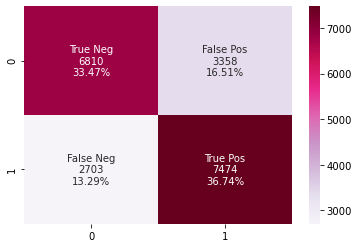

In [144]:
#visualizing confusion matrix for it2
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_i2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_i2.flatten()/np.sum(cnf_matrix_i2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_i2, annot=labels, fmt='', cmap='PuRd');

**Comparision confusion matrix it1 and it2**

**confusion matrix it1**<br/>
TN 6789 <br/>
FN 401 <br/>
FP 0 <br/>
TP 0 <br/>

TN + TP = 94,12%<br/>
FP + FN =  5,88%<br/>

**confusion matrix it2**<br/>
TN 4568 <br/>
FN 1822 <br/>
FP 2140 <br/>
TP 5034 <br/>

TN + TP = 70,79%<br/>
FP + FN = 29,21%<br/>

The confusion matrix changed from iteration 1 to 2. The True values are now more evenly distributed between each other. Unfortunatly however the total percentage of the true values decreased by approx 1/4, which is not ideal.
The false predicted values increased significantly.

#### ROC

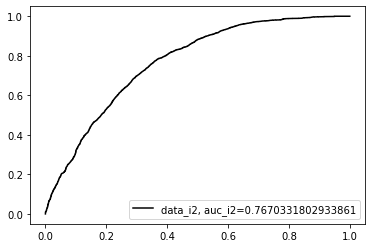

In [161]:
#calculating and visualizing ROC and AUC for it2
y_pred_proba_i2 = classification_i2.predict_proba(X_i2_test)[::,1]
fpr_i2, tpr_i2, _ = metrics.roc_curve(y_i2_test,  y_pred_proba_i2)
auc_i2 = metrics.roc_auc_score(y_i2_test, y_pred_proba_i2)

plt.plot(fpr_i2,tpr_i2,label="data_i2, auc_i2="+str(auc_i2), color='k')
plt.legend(loc=4)
plt.show()

**Comparision ROC & AUC it1 and it2**

AUC it1 = 0.75<br/>
AUC it2 = 0.76<br/><br/>

The ROC and AUC of the model actually improved.
The ROC is slidly closer to the upper left corner, which is an improvement.

#### Conclusion

After looking at the metrics for evaluation of the model from the second iteration we can say that overall the accuracy decreased and the confusion matrix worsened but the ROC and AUC increased/improved.
We still see this as an improvement in general although accuracy decreased.
The next step will be another iteration in which we are aiming for a increased accuracy.

### Modeling (X_i3)

Our goal is to improve our model by
- using the normalized & sampled data
- dropping the average quarterly balances as they might seem irrelevant for our predictions

### Preparing the sampled data to be used in the following iterations

In [75]:
#check if they have the same length
len(X_i2), len(y_i2)

(33908, 33908)

In [76]:
#assign sampled X to the new X
X_i3 = pd.DataFrame(X_i2)
X_i3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.002394,0.004789,0.004789,0.011971,0.351961,0.093377,0.253795,0.186755,0.876311,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.003107,0.003107,0.001553,0.003107,0.428760,0.570127,0.546825,0.225254,0.375942,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.000369,0.001108,0.000369,0.001478,0.411601,0.682430,0.504341,0.277110,0.183632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,0.000631,0.000690,0.000404,0.000976,0.440335,0.533669,0.484805,0.423950,0.319490,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
33904,0.001283,0.003513,0.002566,0.003680,0.418563,0.589327,0.509460,0.332510,0.244071,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
33905,0.003045,0.001549,0.001523,0.006117,0.400240,0.232322,0.252656,0.773554,0.343924,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
33906,0.000324,0.000366,0.000606,0.001056,0.429170,0.262187,0.404194,0.623481,0.426817,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [77]:
# assign the columns to match 
X_i3.columns = X_cols.to_list() + cat_clean.columns.to_list()

In [78]:
# create y_i3
y_i3 = pd.DataFrame(y_i2)
y_i3

,offer_accepted_Yes
0,0
1,0
2,0
3,0
4,0
...,...
33903,1
33904,1
33905,1
33906,1


In [79]:
# create dataframe of both numerical and categorical data
data_i3 = pd.concat([X_i3,y_i3], axis=1)

In [80]:
#test
data_i3.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_home_Yes,offer_accepted_Yes
0,0.002394,0.004789,0.004789,0.011971,0.351961,0.093377,0.253795,0.186755,0.876311,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
1,0.003107,0.003107,0.001553,0.003107,0.428760,0.570127,0.546825,0.225254,0.375942,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
4,0.000369,0.001108,0.000369,0.001478,0.411601,0.682430,0.504341,0.277110,0.183632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


### Modeling

In [81]:
#check column names to drop
data_num.columns

Index(['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'avg_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [82]:
# dropping quarter columns from the sampled dataframe 
data_i3_withoutq = data_i3.drop(['q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'], axis=1)

#### Test & Train

In [83]:
#we use X_i3 and y_i2 from sampled data

#train test split - splitting X and y each into 2 data sets(train data and test data)
X_i3_train, X_i3_test, y_i3_train, y_i3_test = train_test_split(X_i3, y_i2, test_size= 0.4, random_state=40)

In [84]:
#check shape
X_i3_train.shape, X_i3_test.shape, y_i3_train.shape, y_i3_test.shape

((20344, 18), (13564, 18), (20344,), (13564,))

In [85]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()
classification_i3 = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_i3_train, y_i3_train)

In [86]:
#perform prediction on the test set using predict()
predictions_i3 = classification_i3.predict(X_i3_test)

In [87]:
#check predictions array
predictions_i3

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

#### Accuracy score

In [88]:
#calculating accuracy score
accuracy_score(y_i3_test, predictions_i3)

0.7020053081686818

**Comparision accuracy it1, it2 and it3**

accuracy it1 = 0.94<br/>
accuracy it2 = 0.70<br/>
accuracy it3 = 0.69<br/>
<br/>

The accuracy of the model did not increase in the third iteration from the first and second iterations.

#### Confusion matrix

In [89]:
#defining the confusion matrix
cnf_matrix_i3 = confusion_matrix(y_i3_test, predictions_i3)
cnf_matrix_i3

array([[4552, 2201],
       [1841, 4970]])

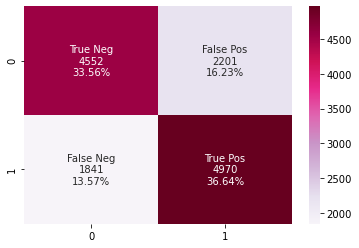

In [145]:
#visualising confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_i3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_i3.flatten()/np.sum(cnf_matrix_i3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_i3, annot=labels, fmt='', cmap='PuRd');

**Comparision confusion matrix it1, it2 and it3**

**confusion matrix it1**<br/>
TN 6789 <br/>
FN 401 <br/>
FP 0 <br/>
TP 0 <br/>

TN + TP = 94,12%<br/>
FP + FN =  5,88%<br/>

**confusion matrix it2**<br/>
TN 4568 <br/>
FN 1822 <br/>
FP 2140 <br/>
TP 5034 <br/>

TN + TP = 70,79%<br/>
FP + FN = 29,21%<br/>

**confusion matrix it3**<br/>
TN 4599 <br/>
FN 1877 <br/>
FP 2154 <br/>
TP 4934 <br/>

TN + TP = 69,75%<br/>
FP + FN = 30,25%<br/>

The confusion matrix has changed, but it is very similar to the second iteration.

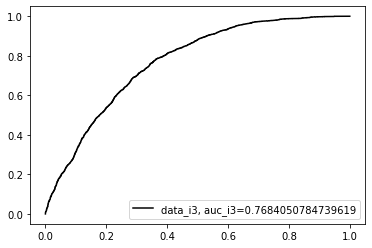

In [160]:
#calculating and visualizing ROC and AUC for it3
y_pred_proba_i3 = classification_i3.predict_proba(X_i3_test)[::,1]
fpr_i3, tpr_i3, _ = metrics.roc_curve(y_i3_test,  y_pred_proba_i3)
auc_i3 = metrics.roc_auc_score(y_i3_test, y_pred_proba_i3)

plt.plot(fpr_i3,tpr_i3,label="data_i3, auc_i3="+str(auc_i3), color='k')
plt.legend(loc=4)
plt.show()

**Comparision ROC & AUC it1, it2 and it3**

AUC it1 = 0.94<br/>
AUC it2 = 0.77<br/>
AUC it3 = 0.76<br/>

<br/>

The ROC and AUC of the model did not improve unfortunately.

#### Conclusion

After looking at the metrics for evaluation of the model from the second iteration we can say that overall the accuracy did not change.
The next step will be another iteration in which we are aiming for a increaded accuracy.

## Modeling (X_i4)

Our idea here is that the following columns:
- bank_accounts_open
- credit_cards_held
- household_size
- homes owned

have numerical values but they should really be categorical. Our goal is to turn them into categorical features and run the iteration to see how that improves our accuracy score.
So we are modeling the 4th iteration on the original dataframe because in the iteration 2 & 3 we have normalized numerical data and sampled the df which we cannot easily undo.

### Preparing the sampled data to be used in the following iterations

In [92]:
# map the values to their new value in each column
conversion_dict = {1: 'One', 2: 'Two',3: 'Three'}
data['bank_accounts_open'] = data['bank_accounts_open'].replace(conversion_dict)

In [93]:
# map the values to their new value in each column
conversion_dict = {1: 'One', 2: 'Two',3: 'Three', 4: 'Four'}
data['credit_cards_held'] = data['credit_cards_held'].replace(conversion_dict)

In [94]:
# map the values to their new value in each column
conversion_dict = {1: 'One', 2: 'Two',3: 'Three', 4: 'Four', 5: 'Five', 
                   6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}
data['household_size'] = data['household_size'].replace(conversion_dict)

In [95]:
# map the values to their new value in each column
conversion_dict = {1: 'One', 2: 'Two',3: 'Three'}
data['homes_owned'] = data['homes_owned'].replace(conversion_dict)

In [96]:
data_numtocat = data

In [97]:
#test 
data_numtocat.dtypes

offer_accepted          object
reward                  object
mailer_type             object
income_level            object
bank_accounts_open      object
overdraft_protection    object
credit_rating           object
credit_cards_held       object
homes_owned             object
household_size          object
own_home                object
avg_balance              int64
q1_balance               int64
q2_balance               int64
q3_balance               int64
q4_balance               int64
dtype: object

In [98]:
# split numerical 
data_num_2 = data_numtocat.select_dtypes(include=['number'])
data_num_2.head()

,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,147,39,106,78,366
1,276,367,352,145,242
2,1219,1578,1760,1119,419
3,1211,2140,1357,982,365
4,1114,1847,1365,750,497


In [99]:
# split categorical data into 
data_cat_2 = data_numtocat.select_dtypes(include=['object'])
data_cat_2.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home
0,No,Air Miles,Letter,Medium,One,No,Medium,Two,Two,Five,Yes
1,No,Air Miles,Postcard,High,Two,No,Medium,Two,One,Two,Yes
2,No,Air Miles,Letter,Medium,Two,No,High,One,One,Four,No
3,No,Air Miles,Letter,Medium,One,No,Medium,Two,One,Six,Yes
4,No,Air Miles,Letter,Medium,One,No,High,Three,One,Four,No


In [100]:
# do the preprocessing steps again

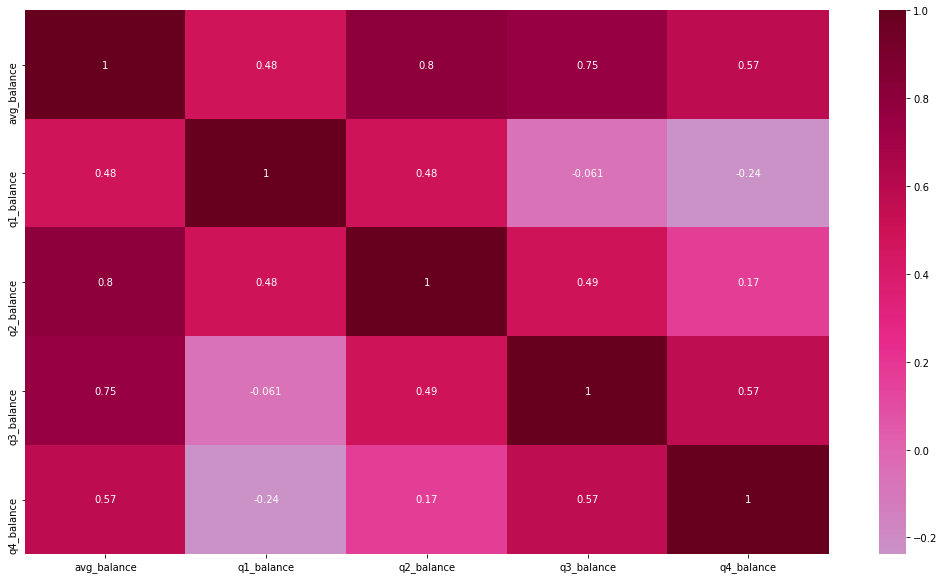

In [146]:
#correlation for numerial columns
corr_matrix = data_num_2.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='PuRd', center = 0, annot=True);

The correlation matrix is very similar to the first one we had, just without the false numeric features.

#### Normalizer & Encoding

In [102]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X_i4 = data_num_2

In [103]:
#normalize and transform
transformer = Normalizer().fit(X_i4)
x_normalized_i4 = transformer.transform(X_i4)

In [104]:
#concat variables into a df
X_i4 = pd.DataFrame(x_normalized_i4, columns=X_i4.columns)

In [105]:
#check columns to copy to cat_2
data_cat_2.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_home'],
      dtype='object')

In [106]:
#encoding categorical features
cat_2 = pd.get_dummies(data_cat_2, columns=['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_home'], drop_first = True)

In [107]:
#test
cat_2

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,bank_accounts_open_Three,bank_accounts_open_Two,overdraft_protection_Yes,credit_rating_Low,...,homes_owned_Three,homes_owned_Two,household_size_Five,household_size_Four,household_size_Nine,household_size_One,household_size_Six,household_size_Three,household_size_Two,own_home_Yes
0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
17995,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
17996,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
17997,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


**Spliting off depended variable (Label)**

**'offer_accepted_Yes'**
because we want to predict if the customer accepts the offer<br/><br/>
offer accepted = YES = 1<br/>
offer not accepted = NO = 0<br/>

In [108]:
# dropping offer_accepted_Yes column as that's what we wanna predict
cat_clean_2 = cat_2.drop(['offer_accepted_Yes'], axis=1)

In [109]:
#test
y_i4 = cat_2['offer_accepted_Yes']

In [110]:
# bring the numerical data (scaled)in with the categorical
X_i4 = np.concatenate((x_normalized_i4, cat_clean_2),axis=1)

### Modeling

#### Test & Train

In [111]:
#train test split - splitting X and y each into 2 data sets(train data and test data)
X_i4_train, X_i4_test, y_i4_train, y_i4_test = train_test_split(X_i4, y_i4, test_size= 0.4, random_state=40)

In [112]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()
classification_i4 = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_i4_train, y_i4_train)

In [113]:
#perform prediction on the test set using predict()
predictions_i4 = classification_i4.predict(X_i4_test)

In [114]:
#test
predictions_i4

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

#### Accuracy score

In [115]:
#calculate accuracy score
accuracy_score(y_i4_test, predictions_i4)

0.9442280945757997

We have an accurcy score of 0.94, which is the same as the first iteration.
We assume turning false numerical features into categorical did not change the model, our conclusions are included in the comments for the confusion matrix.


#### Consfusion matrix

In [116]:
#calculate confusion matrix
cnf_matrix_i4 = confusion_matrix(y_i4_test, predictions_i4)
cnf_matrix_i4

array([[6789,    0],
       [ 401,    0]])

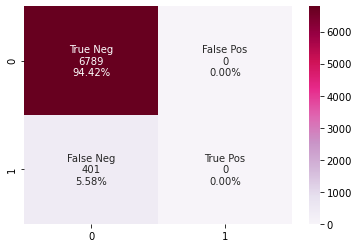

In [147]:
#visualise confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_i4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_i4.flatten()/np.sum(cnf_matrix_i4)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='PuRd');

**First having a look again which is the dependend variable (here its offer accepted Yes/No)**<br/>
0 = No - does not accept offer<br/>
1 = Yes - accepts offer<br/><br/>

**Explanations**<br/>
TN(True negative,0/0) - model predict its No and it is No for 6789 values<br/>
FN(False negative,1/0) - model predict its Yes, but its No for 401 values<br/>
FP(False positive,0/1) - model predict its No, but its Yes for 0 values<br/>
TP(True positive,1/1) - model predict its Yes and it is Yes for 0 values<br/><br/>

**Conclusion**<br/>
**FP** - It great, as its 0%.<br/>
**FN** - 5% is not ideal, but still quiet ok.<br/>
**TN** - This is great, 94% are correctly predicted.<br/>
**TP** - Here is the real issue, because we dont have any true positive (correct predicted offers accepted), we cannot really predict if somebody will actually accept the offer.

This confusion matrix tells us the same as the one from the first iteration. Our conclusion is that turning the false numerical values into categorial did not improve our accuracy score nor the confusion matrix, so these features must not have an impact on wether the customer accepts the offer or not.

#### ROC and AUC

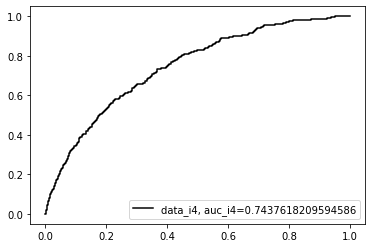

In [159]:
#calculating and visualizing ROC and AUC for it4
y_pred_proba_i4 = classification_i4.predict_proba(X_i4_test)[::,1]
fpr_i4, tpr_i4, _ = metrics.roc_curve(y_i4_test,  y_pred_proba_i4)
auc_i4 = metrics.roc_auc_score(y_i4_test, y_pred_proba_i4)

plt.plot(fpr_i4,tpr_i4,label="data_i4, auc_i4="+str(auc_i4), color = 'k')
plt.legend(loc=4)
plt.show()

Also the ROC and AUC tell us the same as the one from the first iteration. Our conclusion that the changed num features dont impact the target is proven again.

## Modeling (X_i5)

We would like to try a 5th iteration and see if we use KNN based on the third iteration, can we manage to improve the accuracy score.

In [119]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [120]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [121]:
#building a function to test the number of k neibors
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 5) #we try to build between 1 and 5 clusters
 
for k in K: # allows us to go through several Ks
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X) #here they bring in the model K
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [122]:
#calling the function to get the distortion values for Ks
for key, val in mapping1.items():
    print(f'{key}:{val}')

1:1.4275748750403356
2:1.3139835839717795
3:1.2462702933773406
4:1.1952177138020574


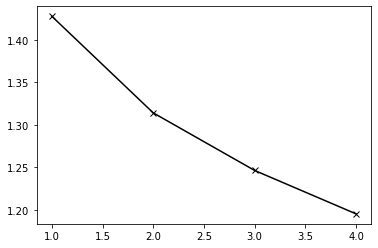

In [158]:
#plotting the distortion graph
plt.plot(K, distortions, 'bx-', color= 'k')

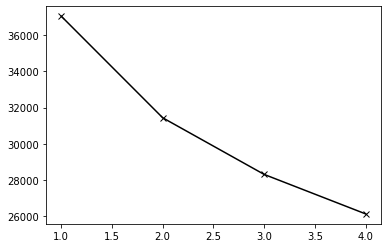

In [157]:
#plotting the inertia graph
plt.plot(K, inertias, 'bx-', color = 'k')

We can see from the elbow curve that the highest drop is from 1 to 2 so we will proceed with n_neigbors = 2.

With the small number of neighbors we can say that the noise will have a higher influence on the result. Research has shown that a small amount of neighbors are most flexible fit which will have low bias but high variance.

Generally, KNN is not suitable for the large dimensional data. We will apply this with our third iteration, where we dropped a couple of features to improve the performance. 

In [125]:
#doing the train test split here
from sklearn.model_selection import train_test_split

X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_i3, y_i3, test_size=0.3, random_state=40)

#### Accuracy score

In [126]:
#importing new classifier for KNN
from sklearn.neighbors import KNeighborsClassifier

In [127]:
#applying classifier and fitting it to mode
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_k_train, y_k_train)
knn.score(X_k_test, y_k_test)

0.8765359284380222

In [128]:
#defining knn predictions
knn_predictions = knn.predict(X_k_test)

In [129]:
print("Accuracy:",metrics.accuracy_score(y_k_test, knn_predictions))

Accuracy: 0.8765359284380222


**Comparision accuracy it1, it2 and it3, it5**

accuracy it1 = 0.94<br/>
accuracy it2 = 0.70<br/>
accuracy it3 = 0.69<br/>
accuracy it5 = 0.84<br/>
<br/>
With applying the KNN model to our 3rd iteration and choosing 2 neigbors we were able to increase our accuracy from the last iteration. Its is not as good as the benchmark, but the benchmarkt was with heavily imbalanced target data.
So this is a very promising development.

#### Confusion matrix

In [130]:
#building new confusion matrix for it5
cnf_matrix_i5 = confusion_matrix(y_k_test, knn_predictions)
cnf_matrix_i5

array([[4444,  603],
       [ 653, 4473]])

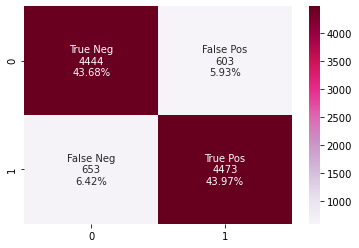

In [148]:
#visualizing confusion matrix for it5
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_i5.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_i5.flatten()/np.sum(cnf_matrix_i5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_i5, annot=labels, fmt='', cmap='PuRd');

**Comparision confusion matrix it1, it2, it3 and it5 (because it4 was almost the same as it1)**

**confusion matrix it1**<br/>
TN 6789 <br/>
FN 401 <br/>
FP 0 <br/>
TP 0 <br/>

TN + TP = 94,12%<br/>
FP + FN =  5,88%<br/>

**confusion matrix it2**<br/>
TN 4568 <br/>
FN 1822 <br/>
FP 2140 <br/>
TP 5034 <br/>

TN + TP = 70,79%<br/>
FP + FN = 29,21%<br/>

**confusion matrix it3**<br/>
TN 4599 <br/>
FN 1877 <br/>
FP 2154 <br/>
TP 4934 <br/>

TN + TP = 69,75%<br/>
FP + FN = 30,25%<br/>

**confusion matrix it5**<br/>
TN 4424 <br/>
FN 623 <br/>
FP 655 <br/>
TP 4471 <br/>

TN + TP = 87,44%<br/>
FP + FN = 12,56%<br/>

The confusion matrix has massivly improved from ite3 to it5. We are now prediciting 87% of the values correctly.
We predict the correctly accepted and declined values evenly, which is also promising.

#### ROC

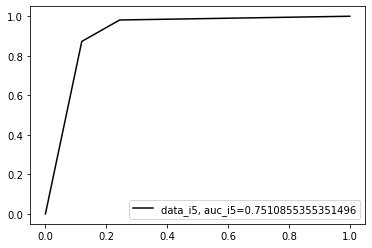

In [156]:
#calculating and visualizing ROC and AUC for it5
y_pred_proba_i5 = knn.predict_proba(X_k_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_k_test,  y_pred_proba_i5)
auc_i5 = metrics.roc_auc_score(y_k_test, y_pred_proba_i5)

plt.plot(fpr,tpr,label="data_i5, auc_i5="+str(auc), color='k')
plt.legend(loc=4)
plt.show()

**Comparision ROC & AUC it1, it2 and it3 and it5**

AUC it1 = 0.94<br/>
AUC it2 = 0.77<br/>
AUC it3 = 0.76<br/>
AUC it5 = 0.75<br/>

<br/>

The ROC looks very different compared to the other iterations. This must be due to the model change now using KNN and not logistic regression.
The AUC of the model worsened a little bit. However as we can see in the iterations 2,3 and 5 the values are very close to each other.

### Conclusion
Our main findings from working through different iterations is that our accuracy improved the most (0.87) with applying the KNN method on top of the sampled data and with less features.

In [133]:
data_i3_withoutq.to_csv(r'/Users/lilmac/Documents/GitHub/ironhack-case-study-classification/data_sets/creditcardmarketing_withoutquarters.csv')
data_numtocat.to_csv(r'/Users/lilmac/Documents/GitHub/ironhack-case-study-classification/data_sets/creditcardmarketing_numtocat.csv')

## Next steps

We could most likely try to further improve our model to get closer to the benchmark accuracy value from it1.

Next steps could include to drop further features.
First it will help the KNN model as it works better with less features.
Secondly we realised from the visual exploration of the data in tableau that there are several of the now categorical features, that did not seem to impact our target. The reduce the noise further we would most likely only keep:
- mailer type
- reward
- income level
- avg balance
